**📋 TABLE OF CONTENTS**
1. **📦 Libraries and Setup**
   - Importing the required libraries and setting up the environment
2. **🛠️ Data Loading and Initial Analysis**
   - Loading the training and test datasets.
   Performing basic checks for missing and duplicate values.
3. **🔧 Preprocessing Pipeline**
   - Custom transformers and pipeline construction for feature engineering and cleaning.
4. **🚂 Model Training with Stratified Cross-Validation**
   - Training models with stratified cross-validation for reliable evaluation.
5. **🎯 Best Model Selection and Performance**
   - Identifying the best model based on cross-validation accuracy.
   - Evaluating the model on the training dataset.
6. **📤 Saving Predictions**
   - Exporting predictions for the best model and all other models.
   - Saving results to CSV files.
7. **📊 Predicted Probability Visualization**
   - Visualizing the distribution of predicted probabilities for the test set.
8. **🎉 Conclusions and Next Steps**
   - Summarizing key findings and outlining potential improvements.

**Table of Contents**
My approach to the competition will include the following steps:
1. **Data Exploration and Visualization** : Gain initial insigjts into the dataset
2. **Feature Engineering**: Create and select meaningful features
3. **Model Training and Tuning**: Build, evaluate, and tune models
4. **Submission Preparation**: Prepare final predictions for submission

In [91]:
# Importing the Necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings


Loading the train and test csvs

In [92]:
# import pandas to read the csv
import pandas as pd

training_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

In [93]:
# previewing the first five columns for each
training_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [94]:
testing_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [95]:
# Training data has 20 columns (including the depression one). The first column is the participant's id
# There are a total of 140,699 entries for each of the columns
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [96]:
# Testing data is missing the depression column, as expected, as this is the column to be predicted
# Testing data has 19 columns. The first column is the participant's id
# There are a total of 93,800 entries for each column
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

DATASET OVERVIEW  
**Feature Descriptions**
1. Name - Participant's name
2. Gender- Participant's gender (male or female)
3. Age - Participant's age - 18 to 60 
4. City - Participant's city of residence
5. Working Professional or student- Indicates whether the participant is a working professional or student
6. Profession- Participant's current profession
7. Academic Pressure - Level of academic workload rated on a scale from 1 to 5
8. Work Pressure - Level of work related workload rated on a scale from 1 to 5
9. CGPA- Cumulative Grade Point Average
10. Study Satisfaction- Satisfaction level with studies, rated on a scale from 1 to 5
11. Job Satisfaction- Satisfaction level with jon, rated on a scale from 1 to 5
12. Sleep Duration- Average hours of sleep per night
13. Dietary Habits- Information about participant's eating habits
14. Degree- Highest degree obtained by the participant
15. Have you ever had suicidal thoughts? Indicates if the participant has had sucicidal thoughts (yes or no)
16. Work/Study Hours- Average daily hours spent on work or study
17. Financial Stress- Level of financial stress rated on a scale from 1 to 5
18. Family History of Mental Illness- Indicates if there is a family history of mental illness (Yes/No).
19. Depression- Represents whether the participant is at risk of depression (Yes/No), based on lifestyle and demographic factors.

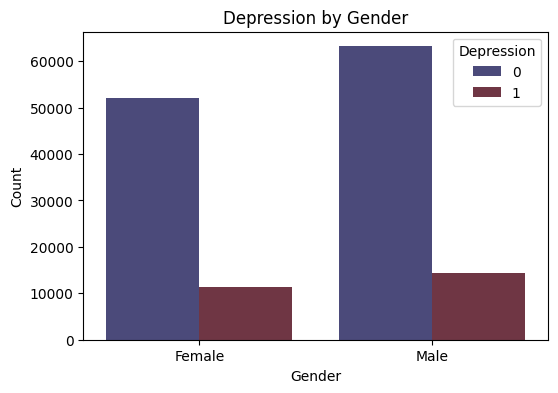

In [97]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', hue="Depression", data=training_data, palette = 'icefire')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Depression by Gender');

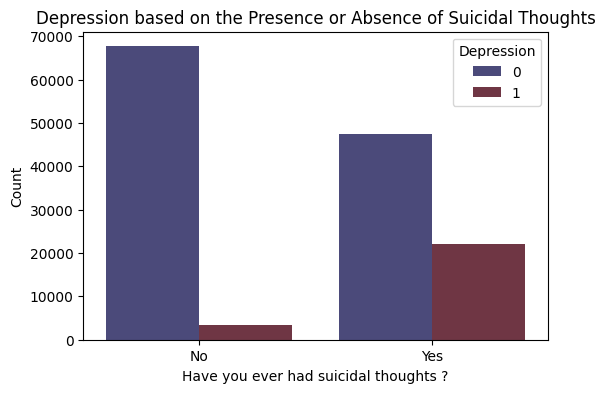

In [98]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Have you ever had suicidal thoughts ?', hue="Depression", data=training_data, palette = 'icefire')
ax.set_xlabel('Have you ever had suicidal thoughts ?')
ax.set_ylabel('Count')
ax.set_title('Depression based on the Presence or Absence of Suicidal Thoughts');

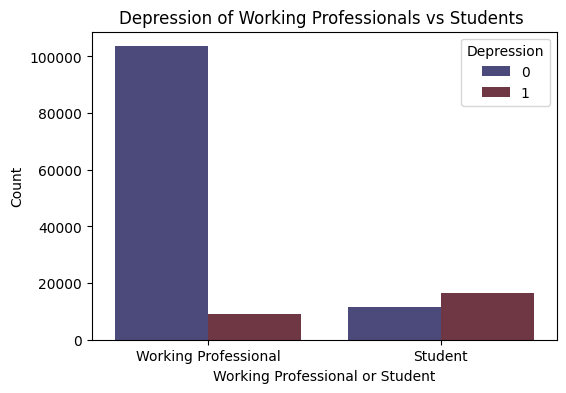

In [99]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Working Professional or Student', hue="Depression", data=training_data, palette = 'icefire')
ax.set_xlabel('Working Professional or Student')
ax.set_ylabel('Count')
ax.set_title('Depression of Working Professionals vs Students ');

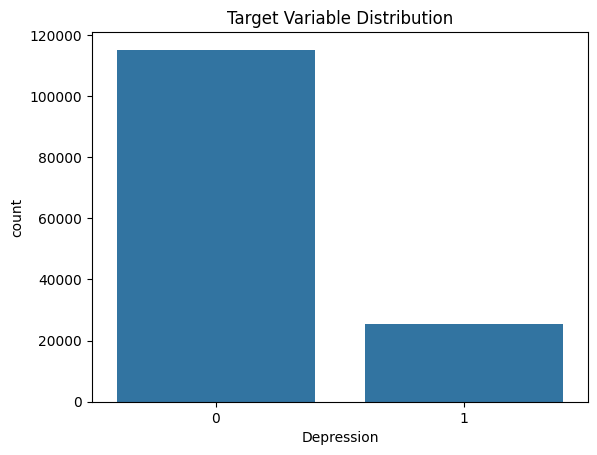

In [115]:
sns.countplot(data=training_data, x='Depression')  # Replace 'target' with the actual column name
plt.title('Target Variable Distribution')
plt.show()

This gives clear evidence of class imbalance. Let's check this out

In [117]:
training_data['Depression'].value_counts()

Depression
0    115127
1     25563
Name: count, dtype: int64

There is a class imbalance issue that will have to be dealt with through oversampling

## Checking for Missing Data

In [100]:
training_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

Several columns in the training data have missing values. These are:
- Profession (36,630 missing values)
- Academic pressure (112,803 values)
- Work pressure (27.918 values)
- CGPA (112,802 values)
- Study Satisfaction (112,803 values)
- Job satisfaction (27,910 values)
- Dietary Habits (4 values)
- Degree (2 values)
- Financial Stress (4 values)

In [101]:
# # checking for null values in the testing data. Whatever we do to the training data, we will do to the testing data
# testing_data.isna().sum()

The same columns in the testing data have missing values, except the financial stress column. However, the number of missing values is different These are:
- Profession (24,632 missing values)
- Academic pressure (75,033 values)
- Work pressure (18,778 values)
- CGPA (75,034 values)
- Study Satisfaction (75033 values)
- Job satisfaction (18,774 values)
- Dietary Habits (5 values)
- Degree (2 values)

Let us assess each of the columns with missing values and see how to handle them:
- 1. Profession- This is a categorical column, with each individual having a different profession such as chef, teacher, business analyst, financial analyst, electrician, software engineer etc
- 2. Academic Pressure- This also seems to be a categorical value such as 5, 3, 2, 1 (CATEGORICAL NUMERICAL)
- 3. Work Pressure- Similar to academic pressure, this is a categorical value with inputs such as 5, 4, 3, 2, 1 (CATEGORICAL NUMERICAL)
- 4. CGPA- This is the GPA value such as 8.97 etc (NUMERICAL NON-CATEGORICAL)
- 5. Job satisfaction- This is also a categorical value such as 2, 5 (CATEGORICAL NUMERICAL)
- 6. Dietary habits - This is a categorical non-numerical value such as moderate, healthy, and unhealthy (CATEGORICAL NON-NUMERICAL)
- 7. Degree - 
- 8. Financial Stress- 

Let's check for the percentage of values that are missing for each of the columns to decide on what to do

In [102]:
print("Percentage of missing values for the profession column is:", training_data['Profession'].isnull().mean() * 100)
print("Percentage of missing values for the academic pressure column is:", training_data['Academic Pressure'].isnull().mean() * 100)
print("Percentage of missing values for the work pressure column is:", training_data['Work Pressure'].isnull().mean() * 100)
print("Percentage of missing values for the CGPA column is:", training_data['CGPA'].isnull().mean() * 100)
print("Percentage of missing values for the job satisfaction column is:", training_data['Job Satisfaction'].isnull().mean() * 100)
print("Percentage of missing values for the dietary habits column is:", training_data['Dietary Habits'].isnull().mean() * 100)
print("Percentage of missing values for the degree column is:", training_data['Degree'].isnull().mean() * 100)
print("Percentage of missing values for the study satisfaction column is:", training_data['Study Satisfaction'].isnull().mean() * 100)
print("Percentage of missing values for the financial stress column is:", training_data['Financial Stress'].isnull().mean() * 100)



Percentage of missing values for the profession column is: 26.03411513859275
Percentage of missing values for the academic pressure column is: 80.1727078891258
Percentage of missing values for the work pressure column is: 19.84221748400853
Percentage of missing values for the CGPA column is: 80.17199715707179
Percentage of missing values for the job satisfaction column is: 19.836531627576402
Percentage of missing values for the dietary habits column is: 0.0028429282160625444
Percentage of missing values for the degree column is: 0.0014214641080312722
Percentage of missing values for the study satisfaction column is: 80.1727078891258
Percentage of missing values for the financial stress column is: 0.0028429282160625444


We can start by dropping the financial stress, dietary habits, and degree rows since they represent a very small percentage of the data

In [103]:
training_data = training_data.dropna(subset=['Degree', 'Financial Stress', 'Dietary Habits'])
training_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36622
Academic Pressure                        112798
Work Pressure                             27913
CGPA                                     112797
Study Satisfaction                       112798
Job Satisfaction                          27905
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

We will fill the missing values in the profession column (categorical non-numerical) with the mode (most recurring profession) and since the percentage of missing values is not that large

In [104]:
most_frequent = training_data['Profession'].mode()[0]  # Get the mode of the column
training_data['Profession'] = training_data['Profession'].fillna(most_frequent)
training_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112798
Work Pressure                             27913
CGPA                                     112797
Study Satisfaction                       112798
Job Satisfaction                          27905
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

Work pressure and Job satisfaction also do not have a lot of missing values (19%) and so we will replace these with the most frequent value in the columns.

In [105]:
# Work Pressure
most_frequent_workpressure = training_data['Work Pressure'].mode()[0]  # Get the mode of the column
training_data['Work Pressure'] = training_data['Work Pressure'].fillna(most_frequent_workpressure)
# Job Satisfaction
most_frequent_job_satisfaction = training_data['Job Satisfaction'].mode()[0]  # Get the mode of the column
training_data['Job Satisfaction'] = training_data['Job Satisfaction'].fillna(most_frequent_job_satisfaction)

training_data.isna().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                    0
Academic Pressure                        112798
Work Pressure                                 0
CGPA                                     112797
Study Satisfaction                       112798
Job Satisfaction                              0
Sleep Duration                                0
Dietary Habits                                0
Degree                                        0
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              0
Family History of Mental Illness              0
Depression                                    0
dtype: int64

We are now left with Academic Pressure, CGPA, and Study Satisfaction with have the most missing values (80%). For these, we will impute with 0, since dropping this rows would lead to a loss of a lot of data, and imputing with the mean, median, or mode, would greatly misrepresent the data.

In [106]:
columns_to_replace = ['Academic Pressure', 'CGPA', 'Study Satisfaction']
training_data[columns_to_replace] = training_data[columns_to_replace].fillna(0)
training_data.isna().sum()

id                                       0
Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

We now have no missing values. Let us check for duplicates

In [90]:
len(training_data[training_data.duplicated()])

0

There are no duplicates.


In [108]:
# Let's view the data afresh
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140690 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140690 non-null  int64  
 1   Name                                   140690 non-null  object 
 2   Gender                                 140690 non-null  object 
 3   Age                                    140690 non-null  float64
 4   City                                   140690 non-null  object 
 5   Working Professional or Student        140690 non-null  object 
 6   Profession                             140690 non-null  object 
 7   Academic Pressure                      140690 non-null  float64
 8   Work Pressure                          140690 non-null  float64
 9   CGPA                                   140690 non-null  float64
 10  Study Satisfaction                     140690 non-null  float

First, the `Name` column is not relevant for modeling and we will not deal with it moving forward.
There are several columns that have string data, which is not ideal for modeling. These are:
- `Gender`
- `City`
- `Working professional or student`
- `Profession`
- `SLEEP Duration`
- `Dietary Habits`
- `Degree`
- `Have you ever had suicidal thoughts ?`
- `Family History of mental illness`

We will convert them to numerical data

In [111]:
categorical_columns = [col for col in training_data.columns if training_data[col].dtypes == 'O']

categorical_columns

# training_data.dtype == 'object'

['Name',
 'Gender',
 'City',
 'Working Professional or Student',
 'Profession',
 'Sleep Duration',
 'Dietary Habits',
 'Degree',
 'Have you ever had suicidal thoughts ?',
 'Family History of Mental Illness']

In [112]:
for feature in training_data.columns: # Loop through all columns in the dataframe
    if training_data[feature].dtype == 'object': # Only apply tfor columns with categorical strings
        training_data[feature] = pd.Categorical(training_data[feature]).codes # Replace strings with an integer

In [113]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140690 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140690 non-null  int64  
 1   Name                                   140690 non-null  int16  
 2   Gender                                 140690 non-null  int8   
 3   Age                                    140690 non-null  float64
 4   City                                   140690 non-null  int8   
 5   Working Professional or Student        140690 non-null  int8   
 6   Profession                             140690 non-null  int8   
 7   Academic Pressure                      140690 non-null  float64
 8   Work Pressure                          140690 non-null  float64
 9   CGPA                                   140690 non-null  float64
 10  Study Satisfaction                     140690 non-null  float

In [114]:
training_data.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,11,0,49.0,50,1,10,0.0,5.0,0.00,0.0,2.0,29,7,33,0,1.0,2.0,0,0
1,1,407,1,26.0,93,1,55,0.0,4.0,0.00,0.0,3.0,27,20,63,1,7.0,3.0,0,1
2,2,417,1,33.0,97,0,55,5.0,2.0,8.97,2.0,2.0,15,7,21,1,3.0,1.0,0,1
3,3,417,1,22.0,64,1,55,0.0,5.0,0.00,0.0,1.0,27,15,28,1,10.0,1.0,1,1
4,4,286,0,30.0,37,1,9,0.0,1.0,0.00,0.0,1.0,15,20,28,1,9.0,4.0,1,0


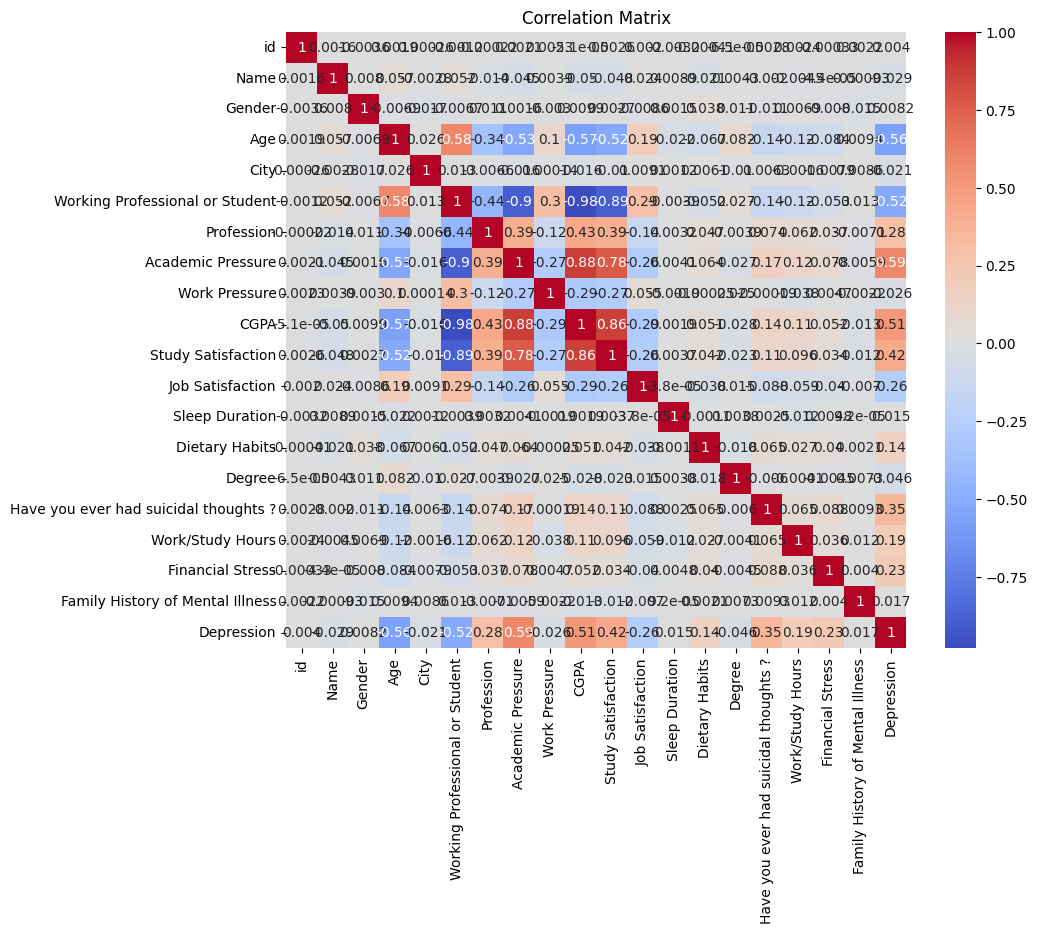

In [116]:
# Check correlations among features
plt.figure(figsize=(10, 8))
sns.heatmap(training_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

To prepare for machine learning, we will standardize all the columns to ensure that they are on the same scale. Here, we will use StandardScaler

CLASS IMBALANCE AFTER FIRST ITERATION TO SEE DIFFERENCE MADE